In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_df=pd.read_csv('Result_per_second.csv')
train_df.head()
print(train_df.head())
train_df2=pd.read_csv('Result_game.csv')
train_df2.head()

   Unnamed: 0               Time    delta  theta  lowAlpha  highAlpha  \
0           7  2020.3.8.14.55.50   407200  76317     10084       1559   
1           8  2020.3.8.14.55.51   732281  63321     18946      17329   
2           9  2020.3.8.14.55.52  1016202  33016     84337      51552   
3          10  2020.3.8.14.55.53  1206405  77753     12870      23332   
4          11  2020.3.8.14.55.54   292169  16982     12701       3306   

   lowBeta  highBeta  lowGamma  midGamma  Meditation  Attention  
0     8026     10371      8693      4081          40         53  
1    10451      8165      6768     13122          54         60  
2    10841      7345      7734      2607          78         53  
3    60177     21929     11005     12340          80         77  
4     6373      3826      7219      5786          90         74  


,Unnamed: 0,Time,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,midGamma,Meditation,Attention
0,76,2020.3.8.16.3.0,714853,61789,19688,5458,3660,3032,961,1089,0,0
1,77,2020.3.8.16.3.1,208060,48743,958,13786,6474,2866,379,274,0,0
2,78,2020.3.8.16.3.2,822575,101091,19533,10140,9293,5857,1682,891,48,38
3,79,2020.3.8.16.3.3,348434,119757,16763,4502,5208,6529,3212,1075,47,37
4,80,2020.3.8.16.3.4,889419,24997,18112,5220,1782,4260,1127,1322,69,53


In [3]:
train_df["label"] = "unsafe"
del train_df["Time"]
del train_df["Unnamed: 0"]
train_df2["label"] = "safe"
del train_df2["Time"]
del train_df2["Unnamed: 0"]
print(train_df.head())
print(train_df2.head())


     delta  theta  lowAlpha  highAlpha  lowBeta  highBeta  lowGamma  midGamma  \
0   407200  76317     10084       1559     8026     10371      8693      4081   
1   732281  63321     18946      17329    10451      8165      6768     13122   
2  1016202  33016     84337      51552    10841      7345      7734      2607   
3  1206405  77753     12870      23332    60177     21929     11005     12340   
4   292169  16982     12701       3306     6373      3826      7219      5786   

   Meditation  Attention   label  
0          40         53  unsafe  
1          54         60  unsafe  
2          78         53  unsafe  
3          80         77  unsafe  
4          90         74  unsafe  
    delta   theta  lowAlpha  highAlpha  lowBeta  highBeta  lowGamma  midGamma  \
0  714853   61789     19688       5458     3660      3032       961      1089   
1  208060   48743       958      13786     6474      2866       379       274   
2  822575  101091     19533      10140     9293      5857   

In [4]:
train_df.describe

<bound method NDFrame.describe of        delta   theta  lowAlpha  highAlpha  lowBeta  highBeta  lowGamma  \
0     407200   76317     10084       1559     8026     10371      8693   
1     732281   63321     18946      17329    10451      8165      6768   
2    1016202   33016     84337      51552    10841      7345      7734   
3    1206405   77753     12870      23332    60177     21929     11005   
4     292169   16982     12701       3306     6373      3826      7219   
..       ...     ...       ...        ...      ...       ...       ...   
149   335304   75848      4646       2103     6083      2557      1238   
150   525772   57952     10584      22785    15602      8037      3054   
151   185961   47104     16848       4867     2899       616      1458   
152   415541  207870      5873      36415    29249     14261      9685   
153    71138    6978      3533       1384      812      1239       579   

     midGamma  Meditation  Attention   label  
0        4081          40     

In [5]:
train_df=pd.concat([train_df, train_df2])

In [6]:
train_df.describe

<bound method NDFrame.describe of        delta  theta  lowAlpha  highAlpha  lowBeta  highBeta  lowGamma  \
0     407200  76317     10084       1559     8026     10371      8693   
1     732281  63321     18946      17329    10451      8165      6768   
2    1016202  33016     84337      51552    10841      7345      7734   
3    1206405  77753     12870      23332    60177     21929     11005   
4     292169  16982     12701       3306     6373      3826      7219   
..       ...    ...       ...        ...      ...       ...       ...   
824    97694  21289     10740       2795     1937      3477       264   
825    78759  28449      1729       4317     3098       919       481   
826   463274  62522     25839      35062    21324     14964     11121   
827   372505  32811     18792       6416     2691     10383      4587   
828   633684  56642      4186       9160     3000      4847       924   

     midGamma  Meditation  Attention   label  
0        4081          40         53  unsa

Text(0, 0.5, 'Class count')

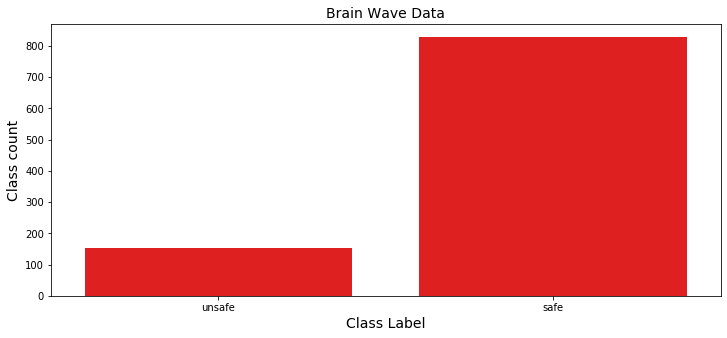

In [7]:
#class distribution from column label (Output is label)
plt.figure(figsize=(12,5))
sns.countplot(x=train_df.label, color='red')
plt.title('Brain Wave Data', fontsize=14)
plt.xlabel('Class Label', fontsize=14)
plt.ylabel('Class count', fontsize=14)

In [8]:
#Null data
train_df.isnull().sum()

delta         0
theta         0
lowAlpha      0
highAlpha     0
lowBeta       0
highBeta      0
lowGamma      0
midGamma      0
Meditation    0
Attention     0
label         0
dtype: int64

In [9]:
label_df=train_df['label']
print(label_df)
train_df.drop('label', axis=1, inplace=True)
train_df.head()

0      unsafe
1      unsafe
2      unsafe
3      unsafe
4      unsafe
        ...  
824      safe
825      safe
826      safe
827      safe
828      safe
Name: label, Length: 983, dtype: object


,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,midGamma,Meditation,Attention
0,407200,76317,10084,1559,8026,10371,8693,4081,40,53
1,732281,63321,18946,17329,10451,8165,6768,13122,54,60
2,1016202,33016,84337,51552,10841,7345,7734,2607,78,53
3,1206405,77753,12870,23332,60177,21929,11005,12340,80,77
4,292169,16982,12701,3306,6373,3826,7219,5786,90,74


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
copy_df=train_df.copy()
copy_df[:]=scaler.fit_transform(copy_df[:])
copy_df.head(20)

,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,midGamma,Meditation,Attention
0,0.119776,0.047556,0.012312,0.003269,0.021452,0.012628,0.024637,0.036998,0.40,0.53
1,0.215828,0.039408,0.023256,0.038458,0.027984,0.009938,0.019177,0.119085,0.54,0.60
2,0.299718,0.020407,0.104008,0.114824,0.029035,0.008939,0.021917,0.023615,0.78,0.53
3,0.355918,0.048457,0.015753,0.051854,0.161928,0.026718,0.031196,0.111985,0.80,0.77
4,0.085788,0.010354,0.015544,0.007167,0.017000,0.004649,0.020456,0.052479,0.90,0.74
5,0.419584,0.005312,0.008443,0.026516,0.039408,0.009469,0.015029,0.023234,0.87,0.90
6,0.107200,0.637633,0.015619,0.051233,0.167555,0.093357,0.096411,0.249664,0.50,0.96
7,0.700364,0.053357,0.058109,0.054703,0.022944,0.005190,0.013378,0.035437,0.60,0.56
8,0.616960,0.324412,0.098055,0.080744,0.197998,0.053537,0.128160,0.250654,0.51,0.44
9,0.476234,0.133690,0.049624,0.018574,0.121192,0.016776,0.049834,0.144171,0.40,0.14


# Random Forest Classifier

In [11]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

model_randomForest=Pipeline(steps=[('random_forest', RandomForestClassifier())])
scores=cross_val_score(model_randomForest, copy_df, label_df, cv=10, scoring='accuracy')
print('Accuracy for Random Forest = ', scores.mean())

Accuracy for Random Forest =  0.84143475572047
Wall time: 3.08 s


###### Accuracy is good and total time taken is short (4.34 secs)


# Logistic Regression Classifier

In [12]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split


model_logisticRegression=Pipeline(steps=[('scalar', StandardScaler()),
                                         ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])
scores=cross_val_score(model_logisticRegression, copy_df, label_df, cv=10, scoring='accuracy')
print('Accuracy for Logistic Regression= ', scores.mean())

Accuracy for Logistic Regression=  0.8313028241599669
Wall time: 494 ms


#### Accuracy less than Random Forest Classifier and time taken is higher

# PCA 

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=scaler.fit_transform(copy_df)
pca=PCA(n_components=10)
pca_vectors=pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained variance ratio by Principal Component ", (index+1) ," : " , var)

Explained variance ratio by Principal Component  1  :  0.5110398443173138
Explained variance ratio by Principal Component  2  :  0.1360386643964578
Explained variance ratio by Principal Component  3  :  0.10139849929647131
Explained variance ratio by Principal Component  4  :  0.07526988937568362
Explained variance ratio by Principal Component  5  :  0.04943322650614975
Explained variance ratio by Principal Component  6  :  0.04195424122918691
Explained variance ratio by Principal Component  7  :  0.029614438159652826
Explained variance ratio by Principal Component  8  :  0.02758748355027443
Explained variance ratio by Principal Component  9  :  0.02102652846858684
Explained variance ratio by Principal Component  10  :  0.0066371847002225735


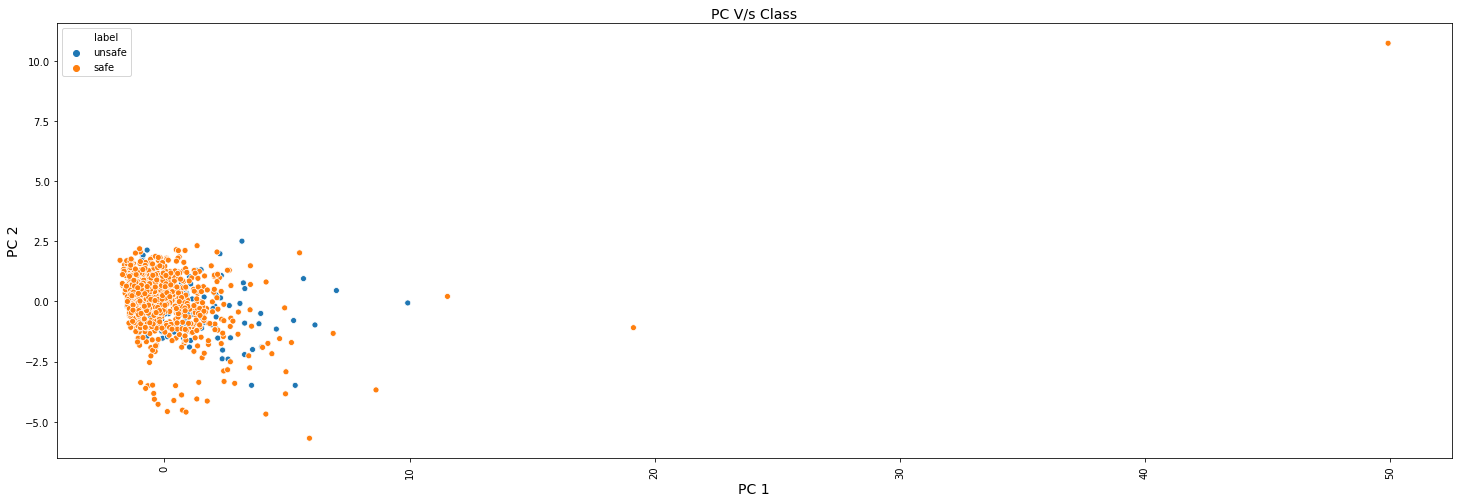

In [15]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:,0], y=pca_vectors[:,1],
               hue=label_df)
plt.title('PC V/s Class', fontsize=14)
plt.xlabel('PC 1', fontsize=14)
plt.ylabel('PC 2', fontsize=14)
plt.xticks(rotation='vertical');

In [16]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

model_lg_pca=Pipeline(steps=[('scaler', StandardScaler()),
                            ('pca', PCA(n_components=2)),
                            ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga',max_iter=200 ))])
scores=cross_val_score(model_lg_pca, copy_df, label_df, cv=10, scoring='accuracy')
print('Accuracy for Logistic Regression :', scores.mean())

Accuracy for Logistic Regression : 0.8362605648319935
Wall time: 169 ms


### Accuracy reduced but time improved sigificantly for Logistic Regression model

In [17]:
# Taking 10 PCs and running the model 

In [18]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

model_lg_pca_10=Pipeline(steps=[('Scaler', StandardScaler()),
                               ('pca', PCA(n_components=10)),
                               ('log_reg', LogisticRegression(multi_class='multinomial', solver='saga', max_iter=200))])

scores=cross_val_score(model_lg_pca_10, train_df, label_df, cv=10, scoring='accuracy')
print('Accuracy for Logistic Regressionwith 10 PCs :', scores.mean())

Accuracy for Logistic Regressionwith 10 PCs : 0.8302824159967017
Wall time: 494 ms


# Artifical Neural Network Classifier (ANN)

In [ ]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split
model_mlp=Pipeline(steps=[('scaler', StandardScaler()),
                         ('mlp_classifier', MLPClassifier(hidden_layer_sizes=(1275, 637)))])
scores=cross_val_score(model_mlp, copy_df, label_df, cv=10, scoring='accuracy')
print('Accuracy for ANN Classifier: ', scores.mean())